In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


train = pd.read_csv("/titanic_train.csv")
X_test = pd.read_csv("/titanic_test.csv")

# only females that survived - males should be predicted
y_test = pd.read_csv("/content/gender_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# get rid of redundant parameters

In [ ]:
X_train = train.drop(["PassengerId",
                      "Survived",
                      "Name",
                      "Ticket",
                      "Cabin",
                      "Embarked"
                      ], axis=1).copy()
X_test = X_test.drop(["PassengerId",
                      "Name",
                      "Ticket",
                      "Cabin",
                      "Embarked"
                      ], axis=1).copy()

y_train = train["Survived"].copy()

In [ ]:
print(X_train[:5], X_test[:5], sep="\n") 

   Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500
   Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  34.5      0      0   7.8292
1       3  female  47.0      1      0   7.0000
2       2    male  62.0      0      0   9.6875
3       3    male  27.0      0      0   8.6625
4       3  female  22.0      1      1  12.2875


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [ ]:
# Fare column has 1 na value, we should drop it
print("is na:", sum(X_test["Fare"].isna()), end="\n"*2)

print(X_test[X_test["Fare"].isna()], end="\n"*2)

X_test = X_test.drop([152], axis=0)
X_test.info()

is na: 1

     Pclass   Sex   Age  SibSp  Parch  Fare
152       3  male  60.5      0      0   NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Sex     417 non-null    object 
 2   Age     331 non-null    float64
 3   SibSp   417 non-null    int64  
 4   Parch   417 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 22.8+ KB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
median_train = X_train["Age"].median() # get median value
median_test = X_test["Age"].median() # get median value


X_train["Age"].fillna(median_train, inplace=True) # replace misisng values with median
X_test["Age"].fillna(median_test, inplace=True) # replace misisng values with median

print(X_train.info(), X_test.info(), sep="\n"*2 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Sex     417 non-null    object 
 2   Age     417 non-null    float64
 3   SibSp   417 non-null    int64  
 4   Parch   417 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 22.8+ KB
None

None


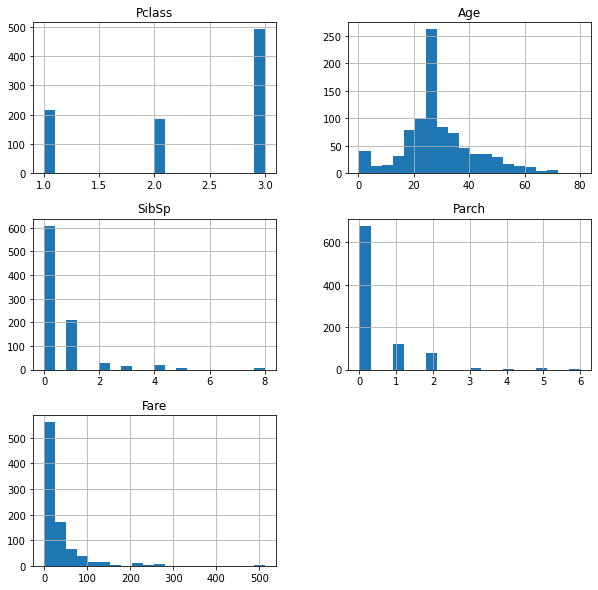

In [ ]:
X_train.hist(bins=20, figsize=(10, 10))
plt.show()

# onehot encode

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.drop(["Sex"], axis=1).astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.drop(["Sex"], axis=1).astype(np.float64))

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)


In [ ]:
# one hot encode categorical attributes
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

cat_encoder = OneHotEncoder(sparse=False)

Sex_train_1hot = cat_encoder.fit_transform(X_train[["Sex"]]) # have to use double [[]]
Sex_test_1hot = cat_encoder.fit_transform(X_test[["Sex"]]) # have to use double [[]]

print(pd.DataFrame(Sex_train_1hot[0:5]), pd.DataFrame(Sex_test_1hot[0:5]), sep="\n")

     0    1
0  0.0  1.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  0.0  1.0
     0    1
0  0.0  1.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  1.0  0.0


In [ ]:
# combine original plus one hot encoded column
X_train_done = pd.concat([X_train_scaled,
                    pd.DataFrame(Sex_train_1hot)],
                    axis=1,
                    join='inner')

X_test_done = pd.concat([X_test_scaled,
                    pd.DataFrame(Sex_test_1hot)],
                    axis=1,
                    join='inner')


X_train_1hot, X_test_1hot

(            0         1         2         3         4              0
 0    0.827377 -0.565736  0.432793 -0.473674 -0.502445    (0, 1)\t1.0
 1   -1.566107  0.663861  0.432793 -0.473674  0.786845    (0, 0)\t1.0
 2    0.827377 -0.258337 -0.474545 -0.473674 -0.488854    (0, 0)\t1.0
 3   -1.566107  0.433312  0.432793 -0.473674  0.420730    (0, 0)\t1.0
 4    0.827377  0.433312 -0.474545 -0.473674 -0.486337    (0, 1)\t1.0
 ..        ...       ...       ...       ...       ...            ...
 886 -0.369365 -0.181487 -0.474545 -0.473674 -0.386671    (0, 1)\t1.0
 887 -1.566107 -0.796286 -0.474545 -0.473674 -0.044381    (0, 0)\t1.0
 888  0.827377 -0.104637  0.432793  2.008933 -0.176263    (0, 0)\t1.0
 889 -1.566107 -0.258337 -0.474545 -0.473674 -0.044381    (0, 1)\t1.0
 890  0.827377  0.202762 -0.474545 -0.473674 -0.492378    (0, 1)\t1.0
 
 [891 rows x 6 columns],
             0         1         2         3         4              0
 0    0.875330  0.394417 -0.500218 -0.400804 -0.497811    (0, 1

In [ ]:
X_train_done

,0,1,2,3,4,0,1
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0
...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0


# predict

### SGD

In [ ]:
X_test_done.iloc[1]

0    0.875330
1    1.385449
2    0.615242
3   -0.400804
4   -0.512660
0    1.000000
1    0.000000
Name: 1, dtype: float64

In [ ]:
y_test.iloc[1]

PassengerId    893
Survived         1
Name: 1, dtype: int64

In [ ]:
sgd_clf.fit(X_train_done, y_train)

sgd_clf.predict([X_test_done.iloc[1]])

array([0])

In [ ]:
sgd = cross_val_score(sgd_clf, X_train_done, y_train, cv=5, scoring="accuracy")
print(sgd, sum(sgd)/5)

[0.76536313 0.74719101 0.73595506 0.75280899 0.79775281] 0.7598141987320319


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest = cross_val_score(forest_clf, X_train_done, y_train, cv=5, scoring="accuracy")
print(forest, sum(forest)/5)

[0.76536313 0.81460674 0.85955056 0.7752809  0.83146067] 0.8092524009792228


### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(random_state=42)
logreg = cross_val_score(logreg_clf, X_train_done, y_train, cv=5, scoring="accuracy")
print(logreg, sum(logreg)/5)

[0.7877095  0.7752809  0.78089888 0.75842697 0.82022472] 0.7845081915761722


### support vector classifier


In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)

svc = cross_val_score(svm_clf, X_train_done, y_train, cv=5, scoring="accuracy")
print(svc, sum(svc)/5)


[0.83240223 0.82022472 0.81460674 0.81460674 0.85955056] 0.828278199736363


### naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaus_clf = GaussianNB()

gaus = cross_val_score(gaus_clf, X_train_done, y_train, cv=5, scoring="accuracy")
print(gaus, sum(gaus)/5)

[0.76536313 0.81460674 0.79775281 0.75842697 0.81460674] 0.7901512773837173


### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNC_clf = KNeighborsClassifier()

knc = cross_val_score(KNC_clf, X_train_done, y_train, cv=5, scoring="accuracy")
print(knc, sum(knc)/5)

[0.79888268 0.78089888 0.8258427  0.83707865 0.83146067] 0.8148327160881301


### best performing support vector classifier

In [ ]:
# code of the book also reached around 82.4% accuracy (without really spending eternity on this problem)

In [ ]:
svm_clf.fit(X_train_done, y_train)
svm_clf.predict([X_test_done.iloc[1]])

array([1])